<a href="https://colab.research.google.com/github/mitali-datascientist/Customer_churn/blob/master/Telco_Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import pandas library
import pandas as pd

In [0]:
#Read data
data = pd.read_csv('/content/churn.csv')

In [3]:
# Size of data
data.shape

(3333, 21)

In [4]:
#View data
data.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [5]:
#Summary of data 
data.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
# View all columns of the data 
data.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [7]:
#Get an overview of data - check numerical and categorical values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [8]:
#Check for duplicates
data.duplicated().sum()

0



```
# Luckily there are no duplicates in the data
```



In [9]:
# Check for null values 
data.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [10]:
#Count number of churners and non-churners 
data['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [11]:
#Summary statistics for churners and non-churners
"""groupby is essentially helpful when one wants to investigate specific columns """ 
data.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [12]:
data.groupby(['Churn']).std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270




```
# Here you may see the churners have  more  customer service calls as compared to non-churners. 
```

 

In [13]:
# Group data by state to see trend in churn 
print(data.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


## Exploring through visualizations 

In [14]:
#Import libraries for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


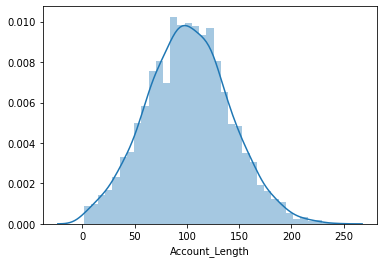

In [15]:
sns.distplot(data['Account_Length'])
plt.show()



```
It shows bell curve which is actually a normal distribution. 
```



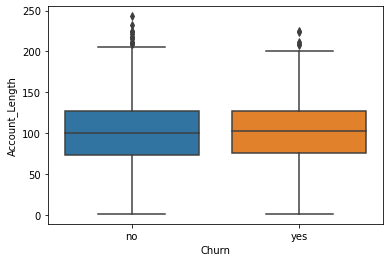

In [16]:
sns.boxplot(x='Churn' , y='Account_Length' , data=data)



```
Still there is no noticeable difference between churners and non-churners' account length. 
```

The outliers can be removed by sym parameter here. 

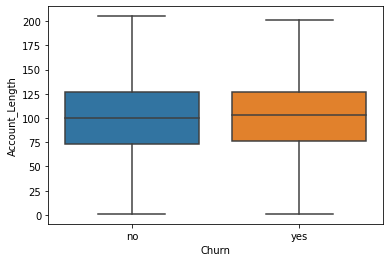

In [17]:
## View without outliers 
sns.boxplot(x='Churn' , y='Account_Length' , data=data , sym='')

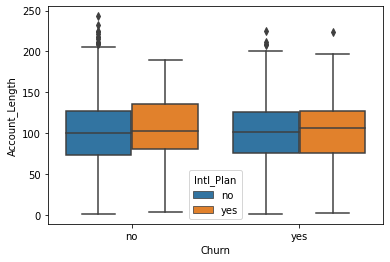

In [18]:
## Adding another variable 
sns.boxplot(x='Churn' , y='Account_Length' , hue ='Intl_Plan' , data=data)

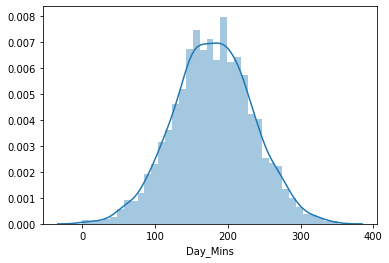

In [19]:
sns.distplot(data['Day_Mins'])

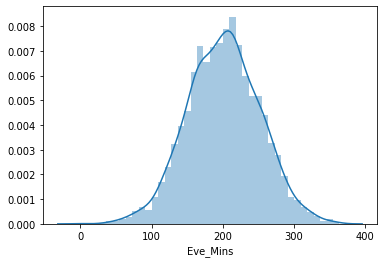

In [20]:
sns.distplot(data['Eve_Mins'])

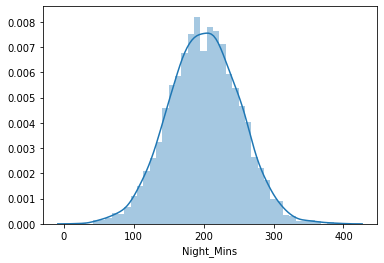

In [21]:
sns.distplot(data['Night_Mins'])

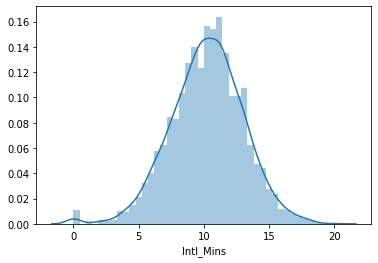

In [22]:
sns.distplot(data['Intl_Mins'])



```
These features show almost the normal distribution
```
We'll try combining more features.


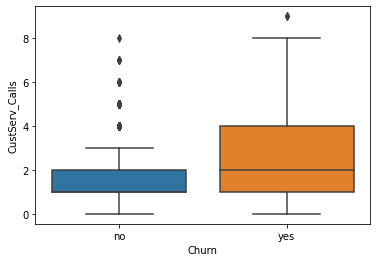

In [23]:
sns.boxplot(x='Churn', y='CustServ_Calls' , data=data)

*Now this is a noticeable difference.*

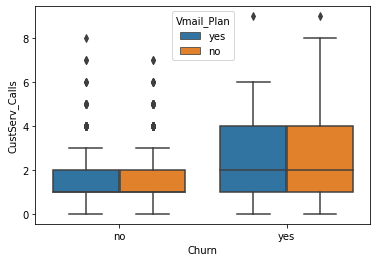

In [24]:

sns.boxplot(x='Churn', y='CustServ_Calls' , hue='Vmail_Plan', data=data)

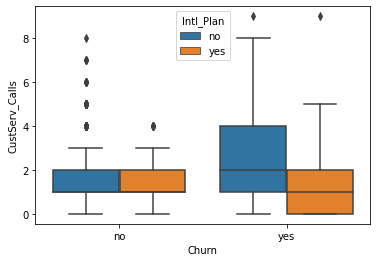

In [25]:
sns.boxplot(x='Churn', y='CustServ_Calls' , hue='Intl_Plan', data=data)



```
Churners make more Customer service calls and rely on international plans as well. 
```



## Data Preprocessing

In [26]:

## Check highly correlated features
data.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094,-0.008264
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674,-0.011886


##### Here , phone numbers , social security numbers and account numbers are insignificant. Hence , we can drop such features.

In [0]:
data = data.drop(['Phone','Area_Code'], axis=1)

In [28]:
data.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')

#### Feature Engineering 

In [0]:
data['Avg_Night_calls'] = data['Night_Mins'] / data['Night_Calls']

In [30]:
print(data['Avg_Night_calls'].head(5))

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_calls, dtype: float64


In [31]:
#Look at the datatypes 
data.dtypes

Account_Length       int64
Vmail_Message        int64
Day_Mins           float64
Eve_Mins           float64
Night_Mins         float64
Intl_Mins          float64
CustServ_Calls       int64
Churn               object
Intl_Plan           object
Vmail_Plan          object
Day_Calls            int64
Day_Charge         float64
Eve_Calls            int64
Eve_Charge         float64
Night_Calls          int64
Night_Charge       float64
Intl_Calls           int64
Intl_Charge        float64
State               object
Avg_Night_calls    float64
dtype: object

Binary features that are categorical can be encoded either by replace() or Label encoding ().


In [0]:
data['Intl_Plan'] = data['Intl_Plan'].replace({"no": 0 , "yes": 1})

In [33]:
data['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

In [34]:
data['Vmail_Plan'] = data['Vmail_Plan'].replace({"no": 0 , "yes": 1})
data['Vmail_Plan'].head()

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64

In [35]:
data['Churn'] = data['Churn'].replace({"no": 0 , "yes": 1})
data['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

Since there are multiple states , assigning labels to them is a bad idea. Hence , we will use one hot-encoding. 

In [0]:
data['State'] = pd.get_dummies(data['State'])

In [37]:
data['State'].head()

0    0
1    0
2    0
3    0
4    0
Name: State, dtype: uint8

### Feature Scaling 

In [38]:
data['Intl_Plan'].describe()

count    3333.000000
mean        0.096910
std         0.295879
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Intl_Plan, dtype: float64

In [39]:
data['Night_Mins'].describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Night_Mins, dtype: float64



```
# This  indicates that we need to rescale our data. 
```



In [40]:
data.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State',
       'Avg_Night_calls'],
      dtype='object')

In [0]:
features = data.drop(['Churn'] , axis=1)

In [50]:
data.dtypes

Account_Length       int64
Vmail_Message        int64
Day_Mins           float64
Eve_Mins           float64
Night_Mins         float64
Intl_Mins          float64
CustServ_Calls       int64
Churn                int64
Intl_Plan            int64
Vmail_Plan           int64
Day_Calls            int64
Day_Charge         float64
Eve_Calls            int64
Eve_Charge         float64
Night_Calls          int64
Night_Charge       float64
Intl_Calls           int64
Intl_Charge        float64
State                uint8
Avg_Night_calls    float64
dtype: object

## Model Selection

In [0]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [0]:
X = features 
y = data['Churn']

In [0]:
# Split training and testing data 
from sklearn.model_selection import train_test_split

X_train, y_train, X_test , y_test = train_test_split(X,y,test_size=0.3 , random_state=0)

In [0]:
classifier.fit(X_train,y_train)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
accuracy = metrics.accuracy_score(Y_test, Y_pred) * 100


In [0]:
#weights of all the variables
weight = pd.Series(classifier.coef_[0], index=X.columns.values)
print("\nweight of all the variables :")
print(wt.sort_values(ascending=False))